<a href="https://colab.research.google.com/github/ashkanb77/improved-DBSCAN/blob/main/ImprovedDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# plot function to plotting results
def plot(X, y):
    df = pd.DataFrame(data=np.hstack((X, y.reshape(y.shape[0], 1))), columns=['X1', 'X2', 'y'])
    cc = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'gray', 'black']
    for key, group in df.groupby('y'):
        plt.scatter(group.iloc[:, 0], group.iloc[:, 1], color=cc[int(key)])

In [ ]:
class ImprovedDBSCAN:
    def __init__(self, k, l, min_points):
        self.k = k
        self.l = l
        self.min_points = min_points
        self.cluster = -1
        self.X = 0

    def fit(self, X):
        dists = []
        for a in X:
            d = np.sqrt(np.sum(np.power(X - a, 2), axis=1))
            dists.append(np.sum(np.sort(d)[1:self.l + 1])) # calculate distances of l nearest neighbors
        dists = np.array(dists) # convert list to numpy array
        args = np.argsort(dists) # sorting distances
        dists = dists[args]
        X = X[args] # also sorting X according to sorted distances

        # reshape dists from (n,) to (n,1) and add -2 column to dists. so dists shape will be (n, 2)
        # X[:, -2] will be cluster: -2: undefined, -1: noise, 0-n: clusters
        dists = np.hstack((np.reshape(dists, (dists.shape[0], 1)), -2 * np.ones((dists.shape[0], 1))))
        X = np.hstack((X, np.zeros((X.shape[0], 1)))) # X[:, -1] = 1 is checked in neighbors updating
        neighbors = set()

        for k in range(dists.shape[0]):
            if dists[k, -1] < 0: # if one sample is undefined or noise
                eps = np.sort(np.sqrt(np.sum(np.power(X[:, :-1] - X[k, :-1], 2), axis=1)))[self.k] # calculate eps: k's nearest neighbor dist
                X[:, -1] = 0 # set samples not checked
                for i in range(X.shape[0]):
                    if dists[i, -1] < 0:
                        d = np.sqrt(np.sum(np.power(X[:, :-1] - X[i, :-1], 2), axis=1)) # calculate distances
                        n = np.where(d <= eps)[0] # where d < eps
                        n2 = n[np.where(dists[n, -1] <= -1)] # n's that undefined or noise
                        if n2.shape[0] >= self.min_points:

                            neighbors.update(n2) # neighbors
                            X[i, -1] = 1 # this sample is checked
                            self.cluster += 1 # increase cluster number
                            dists[n2, -1] = self.cluster # set cluster

                        else: # sample is noise with this eps
                            dists[i, -1] = -1
                        while len(neighbors) > 0:
                            j = neighbors.pop() # pop neighbor
                            if X[j, -1] == 0:
                                X[j, -1] = 1 # checked
                                d = np.sqrt(np.sum(np.power(X[:, :-1] - X[j, :-1], 2), axis=1)) # calculate distance
                                n = np.where(d <= eps)[0] # d < eps
                                n2 = n[np.where(dists[n, -1] <= -1)] # n's are undefined or noise
                                if n.shape[0] >= self.min_points:
                                    neighbors.update(n2) # update neighbors
                                    dists[n2, -1] = self.cluster # cluster neighbor

        self.X = X[:, :-1]
        return self.X, dists[:, -1] # return tuple or sorted X and labels

In [ ]:

def generate_data(): # generating samples that is hard for normal DBSCAN
    xx = np.random.randn(10, 2) * 2 + 3
    yy = np.zeros(xx.shape[0])
    xx = np.vstack((xx, np.random.rand(10, 2) * 0.5 + np.array([[3, -3]])))
    yy = np.hstack((yy, np.ones(10)))
    xx = np.vstack((xx, np.random.rand(10, 2) * 0.1 + np.array([[2.6, -3]])))
    yy = np.hstack((yy, 2 * np.ones(10)))
    return xx, yy

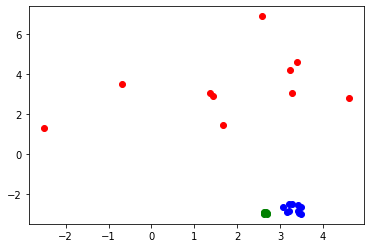

In [ ]:
X, y = generate_data()
plot(X, y)

In [ ]:
dbscan = ImprovedDBSCAN(5, 4, 4) # K = 5 and L = 4 and min_points = 4
sorted_X, labels = dbscan.fit(X)

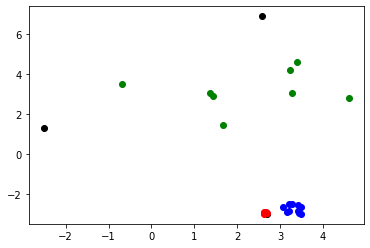

In [ ]:

plot(sorted_X, labels)